# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [96]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [97]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [98]:
def get_summary_stats(name_of_feature):
    # Calculate statistics for feature of interest
    feature_data = features[name_of_feature]

    median_of_feature = np.median(feature_data) 
    mean_of_feature = np.mean(feature_data)
    min_of_feature = np.min(feature_data)
    max_of_feature = np.max(feature_data)
    std_of_feature = np.std(feature_data)

    # Print the calculated statistics
    print "Statistics for feature", name_of_feature, "of the Boston housing dataset:"
    print "Minimum", name_of_feature, ": {:,.2f}".format(min_of_feature)
    print "Maximum", name_of_feature, ": {:,.2f}".format(max_of_feature)
    print "Mean", name_of_feature, ": {:,.2f}".format(mean_of_feature)
    print "Median", name_of_feature, " {:,.2f}".format(median_of_feature)
    print "Standard deviation of", name_of_feature, ": {:,.2f}".format(std_of_feature), "\n"
    return

get_summary_stats('RM')
get_summary_stats('PTRATIO')
get_summary_stats('LSTAT')

Statistics for feature RM of the Boston housing dataset:
Minimum RM : 3.56
Maximum RM : 8.40
Mean RM : 6.24
Median RM  6.18
Standard deviation of RM : 0.64 

Statistics for feature PTRATIO of the Boston housing dataset:
Minimum PTRATIO : 12.60
Maximum PTRATIO : 22.00
Mean PTRATIO : 18.52
Median PTRATIO  19.10
Standard deviation of PTRATIO : 2.11 

Statistics for feature LSTAT of the Boston housing dataset:
Minimum LSTAT : 1.98
Maximum LSTAT : 37.97
Mean LSTAT : 12.94
Median LSTAT  11.69
Standard deviation of LSTAT : 7.07 



### Additional Visualizations: Histograms

It's nice to visualize the data to put the calculated statistics into perspective. I have created histograms of the three feature variables (RM, PTRATIO, LSTAT) and the target variable (prices).

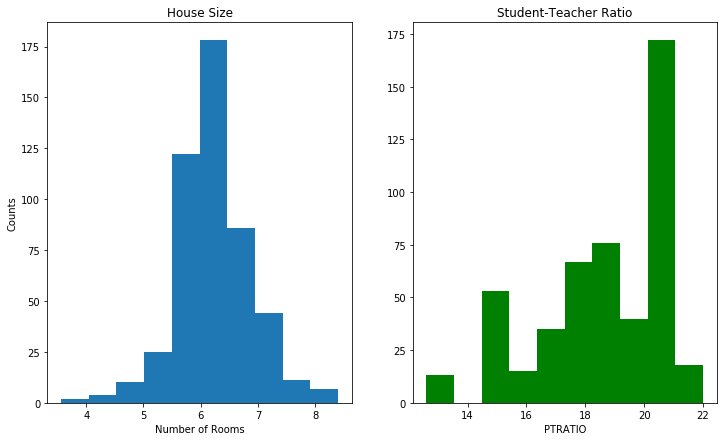

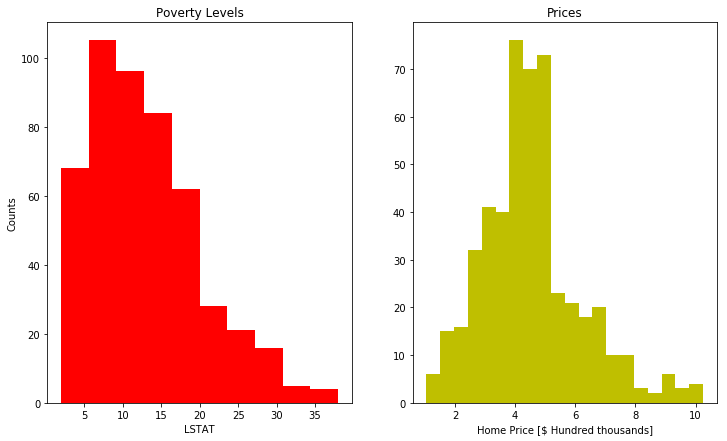

In [99]:
# Create histograms of the features
import matplotlib.pyplot as pl

# Create the figure window
fig = pl.figure(figsize=(12,7))

# Rooms
ax = fig.add_subplot(1,2,1)
ax.hist(features['RM'], bins = 10)
ax.set_title('House Size')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Counts')

# PTRATIO
ax = fig.add_subplot(1,2,2)
ax.hist(features['PTRATIO'], bins = 10, color = 'g')
ax.set_title('Student-Teacher Ratio')
ax.set_xlabel('PTRATIO')


# Create a second figure window
fig2 = pl.figure(figsize=(12,7))

# LSTAT
ax = fig2.add_subplot(1,2,1)
ax.hist(features['LSTAT'], bins = 10, color = 'r')
ax.set_title('Poverty Levels')
ax.set_xlabel('LSTAT')
ax.set_ylabel('Counts')

# Prices
ax = fig2.add_subplot(1,2,2)
ax.hist(prices/100000, bins = 20, color = 'y')
ax.set_title('Prices')
ax.set_xlabel('Home Price [$ Hundred thousands]')

### Scatter plots of 'Price vs Poverty Rate', 'Price vs Number of Rooms', 'Price vs Student-Teacher Ratio'
A scatterplot of the price vs 'LSAT' variable indicates that as poverty rates increase, the price of the home decreases. It appears that as the number of rooms increases, the price increases as well. There appears to be a slight negative correlation between price and student-teacher ratio: as student-teacher ratio increases, price decreases.

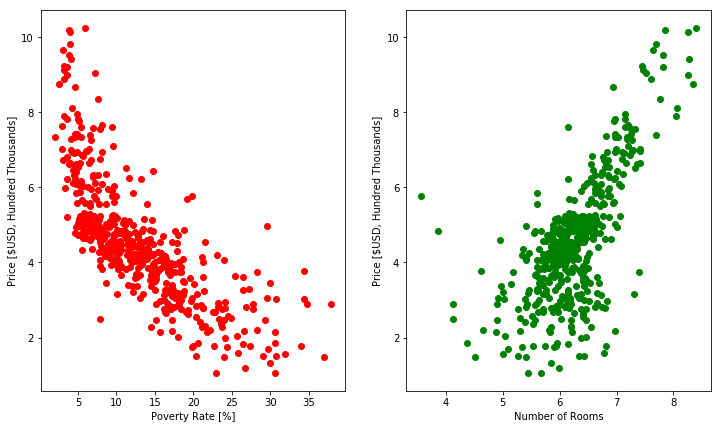

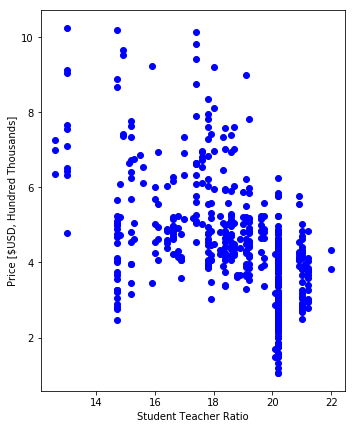

In [100]:
# Open a figure window
fig = pl.figure(figsize=(12,7))

#Scatter plot of price vs poverty rate
ax = fig.add_subplot(1,2,1)
ax.scatter(features['LSTAT'], prices / 100000, c = 'r')
ax.set_xlabel('Poverty Rate [%]')
ax.set_ylabel('Price [$USD, Hundred Thousands]')

# Price vs Rooms
ax = fig.add_subplot(1,2,2)
ax.scatter(features['RM'], prices / 100000, c = 'g')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Price [$USD, Hundred Thousands]')


# Open a figure window
fig2 = pl.figure(figsize=(12,7))

#Scatter plot of price vs poverty rate
ax = fig2.add_subplot(1,2,1)
ax.scatter(features['PTRATIO'], prices / 100000, c = 'b')
ax.set_xlabel('Student Teacher Ratio')
ax.set_ylabel('Price [$USD, Hundred Thousands]')


### Scatter plot of the prices using all three features
In order to make better sense of the impact of room size, poverty rate, and student-teacher ratio on home prices, the data were plotted onto a single graph. The horizontal axis displays poverty rate and the vertical axis represents number of rooms.
In this scatter plot, the price was encoded using color:  homes with higher prices were represented by yellow and green, and homes sold at lower prices were shaded with blue and purple. Student teacher ratio was encoded using marker size: the larger the marker, the higher the student teacher ratio.

The first pattern that emerges is consistent with a previous observation: as poverty rates increase, prices tend to decrease. It also seems that as number of rooms increases, so does the price. In fact, it appears that the most expensive homes tend to have  7+ rooms and are located in neighborhoods with poverty rates below 10%.

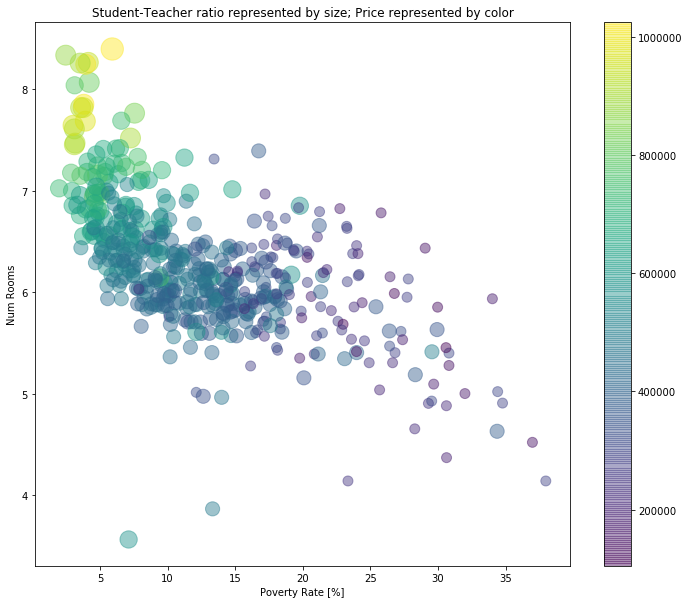

In [101]:
#marker_mapping = discrete_markers(features['PTRATIO'])
bin_edges = np.histogram(prices, bins = 4)
edges =  bin_edges[1]
marker_scales = np.digitize(prices, edges)
marker_scales = 100*marker_scales

# Plot the data onto a single graph
fig = pl.figure(figsize=(12,10))
#for index in range(len(prices)):
pl.scatter(features['LSTAT'],features['RM'], c = prices, s = marker_scales, marker = 'o', alpha = 0.45)
pl.xlabel('Poverty Rate [%]')
pl.ylabel('Num Rooms')
pl.title('Student-Teacher ratio represented by size; Price represented by color')
pl.colorbar()
pl.show()

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

I expect that an increase in 'RM' would typically correspond to an increase in the value of 'MEDV'. That pattern certainly emerges in the scatter plots that were created above.

Houses with more rooms tend to have more floor space than houses with fewer rooms, assuming that rooms are about the same size. Having more rooms provides the homeowner with increased flexibility and / or opportunity to shelter more people. For example, a 5 bedroom home can typically shelter more people than a 1 bedroom home, or at the very least offer more privacy. Or, as another example, a three bedroom house with two bathrooms offers more flexibility to its occupants than a house with three bedrooms and only one bathroom. Last, it's possible that houses with more rooms reside on larger parcels of land than smaller houses, and in the housing market the parcel size is a very large component of house values. So, a house with many rooms may reside on a larger parcel compared to a house with few rooms, leading to a higher price for the larger house.

I expect and observed from the scatter plots that an increase in 'LSAT' would correspond to a decrease in 'MEDV' values. This is because people are generally limited to purchasing houses with values that fall within their financial means. So, the working poor (i.e. 'LSAT' population) will generally not have the financial assets to afford higher priced homes. Consequently, the 'MEDV' values will probably be lower for neighborhoods with high 'LSAT' population, and 'MEDV' values will probably be higher for neighborhoods with low 'LSAT' populations.

I suspected that neighborhoods with high student to teacher ratios ('PTRATIO') would have lower 'MEDV' values. The scatter plot of 'Price vs Poverty Rate' indicates a negative correlation. Schools with lower student to teacher ratios tend to have higher scholastic achievements possibly due to the increased attention that each student receives from the teacher. When people shop for homes, they seek neighborhoods that have schools with high scholastic achievement because they want their kids to have access to excellent educational opportunities. This tends to create a higher demand for homes in neighorhoods having low 'PTRATIO', and generally the home prices increase, causing 'MEDV' to increase too. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [102]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [103]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**
This model has a fairly high coefficient of determination. An R^2 value of 0.923 means that 92.3% of the variance of the target variable has been explained by the model. This seems pretty substantial to me. Also, this is a small data set, so an R^2 of 0.923 seems pretty good! Generally speaking, though, a "good" R^2 value is determined by the problem that is being studied. In some cases 0.923 is not so good or successful, and in other situations 0.923 is excellent. Without knowing anything about this data set, other than its size, I would say that 0.923 is good, since it's much closer to 1 than it is to 0. I would say that according to this metric the model seems to have successfully captured a significant portion of the variation of the target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [104]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 1)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Splitting the dataset into training and testing is a useful and important aspect of creating a predictive model that will generalize well to new, unseen data. Training a model with a dedicated training set and then subsequently validating it on a dedicated test set helps to prevent overfitting and underfitting. By using Complexity Curves--superimposed graphs of a model's training and testing scores as a function of some hyperparameter--it is very easy to determine when a model is overfitting: the testing score is significantly lower than the training score. The superimposed graphs of training scores and testing scores also provides information about when a model is underfit: the training scores are low.

A rule of thumb for splitting the data into two sets is to partition them into 0.80 and 0.20 splits for the training and testing sets, respectively. Other splits such as (0.75, 0.25) and (0.70, 0.30) for (training, testing) are also considered reasonable. These ratios are found to work well when creating a predictive model that neither overfits nor underfits the data. One way to understand why these could be "good" splits is to consider the two extreme scenarios that are presented below.

In the first extreme scenario, the training data comprise 99% of the data and the testing set comprise 1% of the data. After training is performed, this model might achieve a really high training score, but it may achieve a low test score. This would be an overfit model, which is not what we want. Furthermore, we could expect this estimate of the test score to experience high variability due to the relatively few number of testing observations.

In the second extreme, the training dataset is small, say 2% of the full data set. In this case, there is likely not going to be enough variation in the training set for the model to detect and learn significant patterns that are present in the data. Consequently, we can expect a fairly low and unsatisfactory training score from this model. In this case, our predictive model would be underfit.

Based on these two extremes, it would seems that the training set should comprise at least 50% of the full data set. Pareto's Principle is useful for deciding how large the test set should be. The principle states that in most cases 80% of the effects are caused by 20% of the population. This suggests that a test set of 20% is reasonable when testing our model, leaving the remaining 80% of the data available for training. In this setup, the largely sized training data set will probably be highly representative of the full data set, and the testing data set will be large enough to provide a robust generalized prediction score.

In cases where the full data set is small, say about 100 samples, a pure training-testing dataset split is not as helpful, and a suitable version of Cross Validation, such as Leave-One-Out-Cross-Validation or K-Fold Cross-Validation, should be used. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

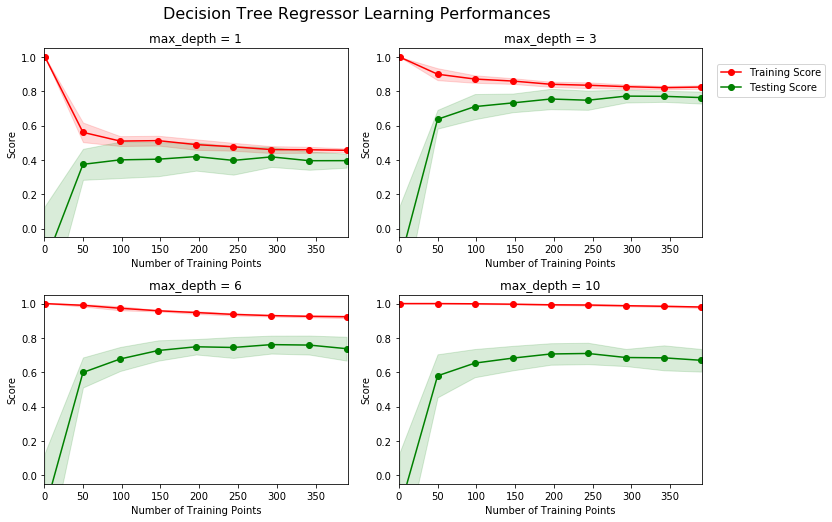

In [105]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

The graph that I choose has maximum depth of 3.

The score of the training curve starts at the value 1.0. As the number of training points increases the training score gradually decreases, converging to a value of approximately 0.80 from above. Additionally, the standard deviation of the training curve reduces in size as the number of training points increases, which is an expected observation described by estimation theory of statistics---- as the number of observations increases, our certainty about estimated values increases. 

The testing score starts at a value of 0.0. As the number of training points increases, the testing score increases and converges upon a value close to 0.80 (say 0.79) from below. At 400 training points, the test score and training score are closest.

It appears that having more than 400 training points will not benefit the model since both training and testing scores do not seem to be changing much at that stage. In fact, the model would have given nearly the same training and test scores if only 200 training observations were used. This is useful information: at some point the training data set size will be sufficient to produce the best test score that the given complexity of the model will ever yield. Unfortunately, the only way to determine the sufficient training set size is to actually generate these graphs with more than 200 points. But at least by the time we have utilized 400 training points, we know that we do not need to add any more. This saves time.

The general trends of the training and testing scores that was described above is reflected in the graphs with max depth of 1, 6, and 10. The main differences are the values of the training and testing scores, as well as their separation. Of all graphs, the one with max depth of 3 is the best model. It yields the highest testing score, and the separation between testing and training scores is small. The final separation of the training and testing curves for the model with max depth of 1 is excellent and comparable to the "max_depth = 3" model. However, the final testing score is only 0.40 (compared to 0.80 for max depth = 3), and it has higher uncertainty too.

Overall, these results indicate that a model with a low level of complexity (such as max_depth = 1) might yield excellent separation of final training and testing scores, but the value of that final testing score may be sub-optimal. In that case, the lower complexity is not capturing some of the patterns in the data. On the other hand, models with too much flexibility / complexity (i.e. max_depth = 6 and max_depth = 10) tend to suffer from overfitting as indicated by sub-optimal test scores near 0.65 and large separations between the training scores and testing scores.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

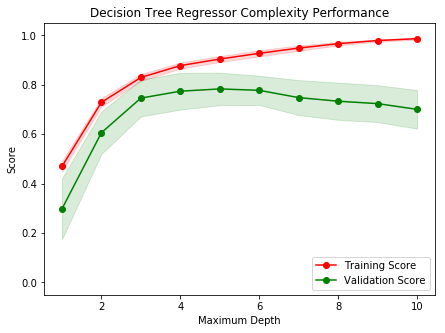

In [106]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **
When the model is trained with maximum depth of 1, it suffers from high bias. The validation score is at its minimum value here, and it is a factor of two smaller than the second smallest validation score (located at max depth of 2). From a max depth of 1, the green validation score monotonically increases (and by a significant factor) as the max depth increases to 2, 3, and 4. Together, these characteristics indicate that the model at max depth of 1 is simply not complex enough to pick up on the patterns in the data; it is an underfit model.

When the model is trained with a maximum depth of 10, it suffers from high variance and is overfitting the training data. This is determined by noticing that at this point the green validation score is trending downward and away from its maximum value (located at maximum depth of 6). Another observation which hints at overfitting at max depth of 10 is that the green validation score is trending / deviating from the red training curve. In short, the model shows signs of "memorizing" the data at 'maximum depth' values greater than 4, because at these depths the training score increases in value toward 1 while the validation score decreases from its maximum value.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

The validation score is at a maximum value at max depth of 4, after which the score decreases. The separation between the training and validation scores also increases beyond a maximal depth of 4. Based on these two observations it could be argued that maximal depth of 4 is the optimal choice; however, I am going to choose the max depth of 3. At a max depth of 3, the validation score is nearly comparable to that of max depth 4, and the separation between the training and validation curves is comparable if not smaller than max depth of 4. Since a model with max depth of 3 is simpler than that of max depth = 4 while having a comparable validation score, I argue that the max depth of 3 model is the optimal choice for this decision tree. The gains in validation score for a max depth of 4 model appear to be too marginal to justify the (slightly) increased complexity.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

The grid search technique provides an efficient way of searching a hyper-parameter space for the 'optimal' combination of arguments to pass into a learning algorithm, where the 'optimal' combination of hyper-parameters are the ones that lead to the best (i.e. lowest) cross-validated training error. Using a grid search allows the programmer to determine the optimal hyper-parameters in a systematic way and is the recommended approach for determining these input arguments. If done well, the grid search technique can save a programmer some time.

According to the online python documentation, the grid search consists of five components: 
(1) classification or regression estimator
(2) parameter space
(3) method for searching or sampling candidate parameters (i.e. exhaustive approach or use of a probability distribution)
(4) cross-validation scheme for evaluating the model
(5) score function, which is used by the cross-validation method to evaluate and compare the performance of all combinations of parameters that have been sampled in the grid search.

Here is the construction of a simple grid search in the classification setting:
(1) sklearn.svm.SVC()
(2) parameter_grid = [
                      {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                      {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                     ]
(3) 'GridSearchCV'
(4) 'StratifiedShuffleSplit'
(5) 'f1'

This grid search is set up to compare and choose between two sets of parameters when training a support vector machine classifier. The first set of hyper-parameters is used for a linear kernel, and the second set of parameters is for an rbf kernel. The search method is specified as 'GridSearchCV', which means the program will perform an exhaustive search by testing every combination of parameters within each of the two sets of hyper-parameters listed in parameter_grid. For the linear kernel, the search will try four different kernel sizes (C = 1,10,100,1000). For the rbf kernel set of parameters, the search will test all eight combinations of kernel size and gamma. The 'StratifiedShuffleSplit' cross-validation will be used for training all learning algorithms, and the F1 score will be used to report the Cross-Validated score. The search will return the more optimal choice between linear and rbf. If the linear kernel leads to the best F1 score (when comparing the F1 scores of all linear and rbf models), the search will return the kernel size C that led to the best F1 score. If instead rbf yields the best F1 score, then the search returns the kernel size and gamma combination that yielded the best F1 score.

It's possible to use a grid search to first obtain a rough estimate (or neighborhood) of the optimal hyperparameters, followed by a second grid search to refine these hyperparameter values. For example, with a 'linear' SVC classifier a grid search on kernel sizes C = [1 10 100 1000] may indicate that the optimal kernel size C is 1. But a second grid search using C = [1 0.5 0.25 0.125] may determine that C = 0.25 is actually a better choice than C = 1.

Since the time for performing a grid search increases with each new combinations of parameters, it's best to have a good strategy for using this method. It is particularly helpful to know when a set of good parameters is sufficient. 

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

The k-fold cross-validation technique is a method that can be used to train a learning model while providing a less variable estimate of training error. It is an alternative to the classic hold-out method in which the data are divided into a large training set containing say 80% of the samples, and a smaller test set containing 20% of the samples. In this technique, the letter 'k' represents an integer greater than two. The data are divided into k roughly equal-sized bins, referred to as folds. For example, in 5-fold cross-validation, the data are divided into k=5 equally sized bins. Training is performed on k-1 of the folds, and tested on the remaining fold. A test score is calculated and stored for later use. Then the process of training and testing is repeated k-1 additional times (for a total of k processes), where each fold takes a turn at being used as the test set. In the end, we have k different estimates for the test score. We then take the arithmetic average of those scores and utilze that averaged result as our estimate of the testing score for the learning model.

The basic version of k-fold cross-validation has been described above, but there are many variations of the technique. For example, there is a version which makes sure that each fold contains approximately the same distribution of observations as the full data set. This is important for classification problems for which the data contain unbalanced classes (i.e. 10% abnormalities and 90% non-abormalities)

The benefits of using k-fold cross-validation for grid search are that:
(1) it utilizes only the training data, thereby avoiding the problem of having our test data leak into model development
(2) the test score that is obtained with k-fold cross validation exhibits a reduced variation compared to the classic hold-out method. So in that sense the cross-validation test score is a better estimate to use for comparing all models.

The k-fold cross-validation method is often useful for training models when the available data set is small. And depending on the choice of training model, k-fold cross-validation may be too time consuming when the available data set is rather large. In that case, the hold-out method is a better option in terms of reducing computation time.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [107]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 0) 

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': np.arange(1,11)} 

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better = True)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [108]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 6 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The optimal model, according to the GridSearchCV algorithm is the one with max_depth of 6. After reviewing the complexity curve in the figure above, it makes sense that the algorithm chose this model. This model achieves the largest test score.

The result provided by GridSearchCV differs from my result for the optimal model (max_depth = 3). This is because GridSearchCV only uses the score function to make its decision; whereas, I also took into account the complexity of the model. So, in short, the decision making process differed between me and the grid search. I opted for a less complex model which achieved nearly the same, but technically slightly lower, test score.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [109]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $424,935.00
Predicted selling price for Client 2's home: $284,200.00
Predicted selling price for Client 3's home: $933,975.00


**Answer: **

I would recommend that client 1 sell his/her home for a price of \$424,935.00, that client 2 list their home at \$284,200.00, and that client 3 sell his/her home at \$933,975.00. These are the prices that have been predicted by the optimal decision tree algorithm.

The prices for each home seems reasonable given the data.

Client 3 has a home with attributes that lead to a high selling price. First, it has 8 rooms and resides in a neighborhood with a very low poverty rate of 3%. It was shown in the colorful bubble chart above that the most expensive homes tend to have 7+ rooms and poverty levels below 10%. Based on these two attributes, I expect the selling price for Client 3's house to be the highest among all three clients, and to also be high among all homes in Boston. I would expect Client 3's house to be valued near the maximum value of $1.02 MM, which it is.

I expected Client 1's home to be priced as the second highest among these three clients due to its attributes. Since the house has half the number of rooms as Client 3's house, and is situated in a neighborhood with nearly 6 times the poverty rate but a good public school district, I do expect Client 2's selling price to be about half that of Client 3's home, which it is. Another way to look at this is that the home has 1 room less than the median number of rooms, and it resides in a neighborhood with a slightly higher poverty rate than the median, so the fact that the predicted price is slightly lower than the median seems reasonable.

Last, I expected Client 2's house to sell for the lowest price among the three homes since it is in neighborhood with the highest poverty level by far and has the fewest number of rooms. In fact, I expect the home to be sold for a low price within the market. It's PTRATIO may not be as low as Client 1 or Client 3, but that particular feature does not seem to impact price as strongly as number of rooms or poverty rate. The poverty rate and number of rooms charactarize this house as a low-valued home, and based on the calculated statistics, the price resides within the lowest 2% of the market. This seems reasonable to me.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [110]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

The constructed model should not be used in a real-world setting. There are many reasons. For one, this model uses data from 1978. Even though the data have been multiplicatively scaled, it's best to use present day data to reflect the actual prices. Changes that are unrelated to inflation may have occured in Boston that have caused some homes to change value faster or slower than others. For example, perhaps the poverty levels have changed significantly thoughout the city. Also, this model only utilizes three features which I doubt are sufficient for a home-pricing model. These models should probably take into account additional factors such as age of the home, quality and age of appliances, number of garages, presence of a basement or attick, parcel size, proximity to highways or shopping centers, etc. Home prices also vary with season of the year, which has not been included in this model. Additionally, this model makes predictions that vary quite a bit. In the example above, the predicted price range of \$73k is approximately 18% of the mean predicted value (approximately $406k). That variation is too high. Last, this model would not be appropriate for rural areas or towns, which would have much lower home prices compared to Boston.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.